# KBinsDiscretizer



`KBinsDiscretizer` from `sklearn` is a tool that transforms continuous data (e.g., floating-point numbers) into discrete bins (categories). It’s often used when you want to convert numerical data into categories for algorithms that don’t handle continuous features well or when you want to simplify data.

### Key Concepts:

- **Binning**: The process of dividing a range of continuous values into intervals (bins). Each bin represents a category.
- **Discretization**: Converting continuous features into categorical ones by placing them into different bins.
  
### Parameters:
- **n_bins**: Number of bins to create. More bins mean finer categorization.
- **encode**: The method used to encode the bin values. Options include:
  - `'onehot'`: Converts each bin into a separate binary feature (one-hot encoding).
  - `'ordinal'`: Assigns ordinal values (0, 1, 2, ...).
  - `'onehot-dense'`: Similar to onehot but outputs dense arrays instead of sparse.
- **strategy**: Defines how bins are created. Options are:
  - `'uniform'`: Each bin has the same width (equal range).
  - `'quantile'`: Each bin contains an equal number of data points.
  - `'kmeans'`: Bins are created based on K-Means clustering.


### Explanation:

1. **Original Data**: We generate 100 random data points between 0 and 10.
2. **Uniform Strategy**: The data is split into 5 bins of equal range (width).
3. **Quantile Strategy**: The data is split into 5 bins such that each bin has an equal number of data points.

### Visualization:

- The first plot shows the distribution of the original data.
- The second plot shows the data discretized into 5 bins using the uniform strategy.
- The third plot shows the data discretized into 5 bins using the quantile strategy.

### Why Use KBinsDiscretizer?
- **Simplicity**: Turning continuous data into discrete bins makes it easier to interpret or use in some machine learning algorithms (e.g., decision trees).
- **Handling Non-linear Relationships**: In some cases, discretizing continuous data can help models capture non-linear relationships.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


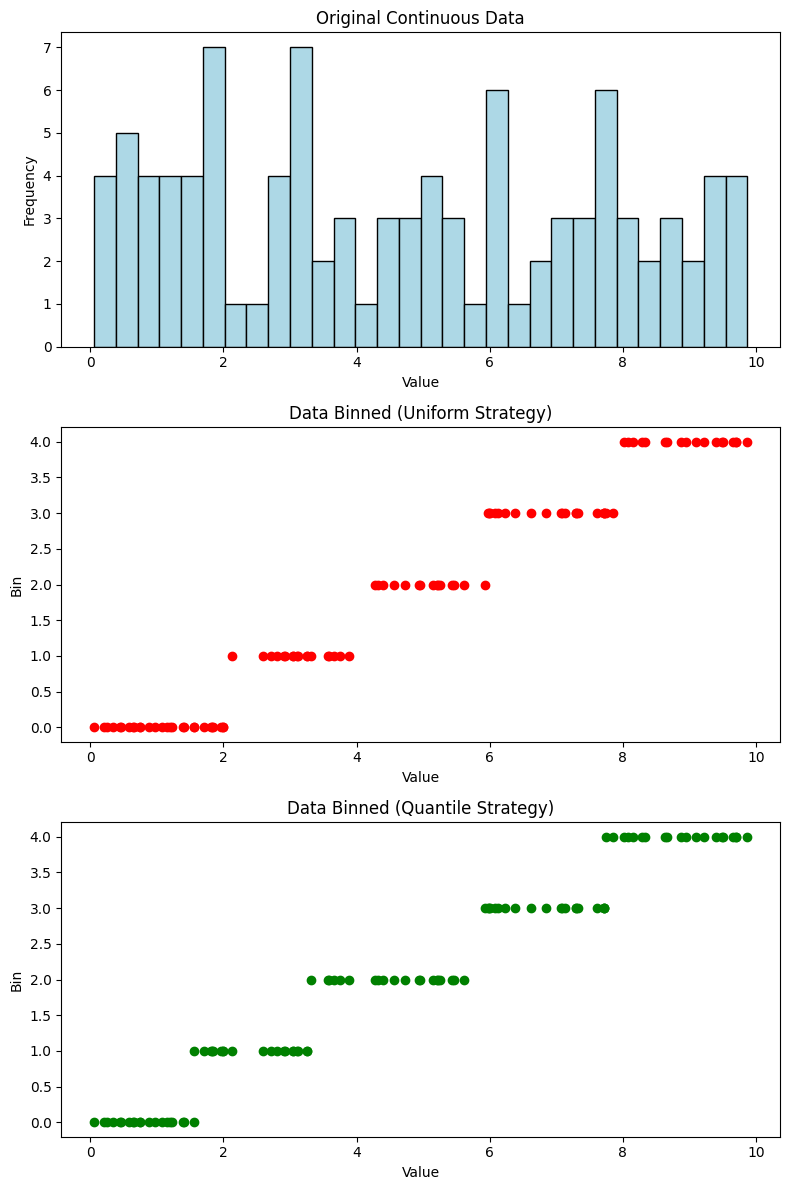

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generate some continuous data
np.random.seed(42)
data = np.random.rand(100, 1) * 10  # 100 samples of data between 0 and 10

# Apply KBinsDiscretizer
n_bins = 5
discretizer_uniform = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
discretizer_quantile = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
discretizer_kmeans = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')

# Fit and transform the data
data_binned_uniform = discretizer_uniform.fit_transform(data)
data_binned_quantile = discretizer_quantile.fit_transform(data)
data_binned_kmeans = discretizer_kmeans.fit_transform(data)

# Plot the original data and the binned data
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Original data
axs[0].hist(data, bins=30, color='lightblue', label='Original Data', edgecolor='black')
axs[0].set_title('Original Continuous Data')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Uniform bins
axs[1].scatter(data, data_binned_uniform, color='red', label='Uniform Bins')
axs[1].set_title('Data Binned (Uniform Strategy)')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Bin')

# Quantile bins
axs[2].scatter(data, data_binned_quantile, color='green', label='Quantile Bins')
axs[2].set_title('Data Binned (Quantile Strategy)')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Bin')

plt.tight_layout()
plt.show()

# use cases

Here are a few real-life use cases where using `KBinsDiscretizer` could be helpful:

### 1. **Age Grouping in Healthcare**
   - **Use Case**: In healthcare, continuous age values can be discretized into age groups like 0-18, 19-35, 36-50, etc.
   - **Why**: Helps analyze trends or provide recommendations based on age categories (e.g., different treatment plans for age groups).

### 2. **Income Brackets in Finance**
   - **Use Case**: In financial analysis, continuous income values can be binned into low, medium, and high-income brackets.
   - **Why**: Easier to classify customers for targeted marketing or loan risk assessment.

### 3. **Temperature Binning in Climate Studies**
   - **Use Case**: Temperature data can be binned into categories like "Cold", "Moderate", and "Hot."
   - **Why**: Simplifies analysis for climate patterns, making it easier to study relationships between temperature ranges and weather events.

### 4. **Customer Segmentation in Marketing**
   - **Use Case**: Customer spending can be binned into "low spenders," "average spenders," and "high spenders."
   - **Why**: Allows businesses to create targeted marketing campaigns based on spending patterns.

### 5. **Categorizing Exam Scores in Education**
   - **Use Case**: Discretizing exam scores into "Fail," "Pass," "Merit," and "Distinction" based on predefined ranges.
   - **Why**: Simplifies the evaluation and classification of student performance for grading purposes.


# Demonstrating the different strategies of KBinsDiscretizer

This example presents the different strategies implemented in KBinsDiscretizer:

- ‘uniform’: The discretization is uniform in each feature, which means that the bin widths are constant in each dimension.

- quantile’: The discretization is done on the quantiled values, which means that each bin has approximately the same number of samples.

- ‘kmeans’: The discretization is based on the centroids of a KMeans clustering procedure.

The plot shows the regions where the discretized encoding is constant.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer

strategies = ["uniform", "quantile", "kmeans"]

n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

# construct the datasets
random_state = 42
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(
        n_samples=[
            n_samples // 10,
            n_samples * 4 // 10,
            n_samples // 10,
            n_samples * 4 // 10,
        ],
        cluster_std=0.5,
        centers=centers_0,
        random_state=random_state,
    )[0],
    make_blobs(
        n_samples=[n_samples // 5, n_samples * 4 // 5],
        cluster_std=0.5,
        centers=centers_1,
        random_state=random_state,
    )[0],
]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

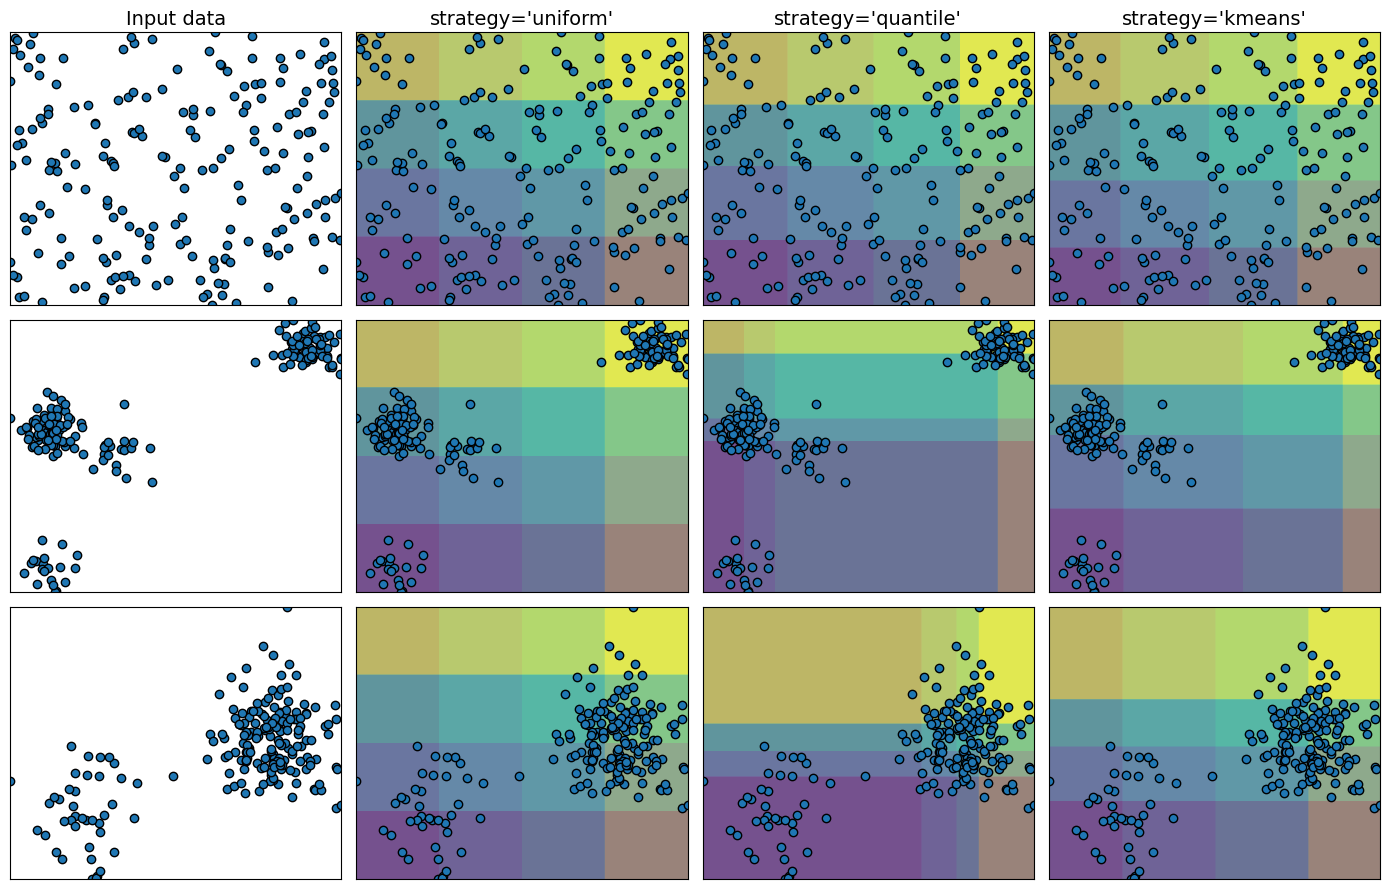

In [2]:
figure = plt.figure(figsize=(14, 9))
i = 1
for ds_cnt, X in enumerate(X_list):
    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=0.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=0.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy,), size=14)

        i += 1

plt.tight_layout()
plt.show()

# Using KBinsDiscretizer to discretize continuous features

The example compares prediction result of linear regression (linear model) and decision tree (tree based model) with and without discretization of real-valued features.

As is shown in the result before discretization, linear model is fast to build and relatively straightforward to interpret, but can only model linear relationships, while decision tree can build a much more complex model of the data. One way to make linear model more powerful on continuous data is to use discretization (also known as binning). In the example, we discretize the feature and one-hot encode the transformed data. Note that if the bins are not reasonably wide, there would appear to be a substantially increased risk of overfitting, so the discretizer parameters should usually be tuned under cross validation.

After discretization, linear regression and decision tree make exactly the same prediction. As features are constant within each bin, any model must predict the same value for all points within a bin. Compared with the result before discretization, linear model become much more flexible while decision tree gets much less flexible. Note that binning features generally has no beneficial effect for tree-based models, as these models can learn to split up the data anywhere.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X_binned = enc.fit_transform(X)

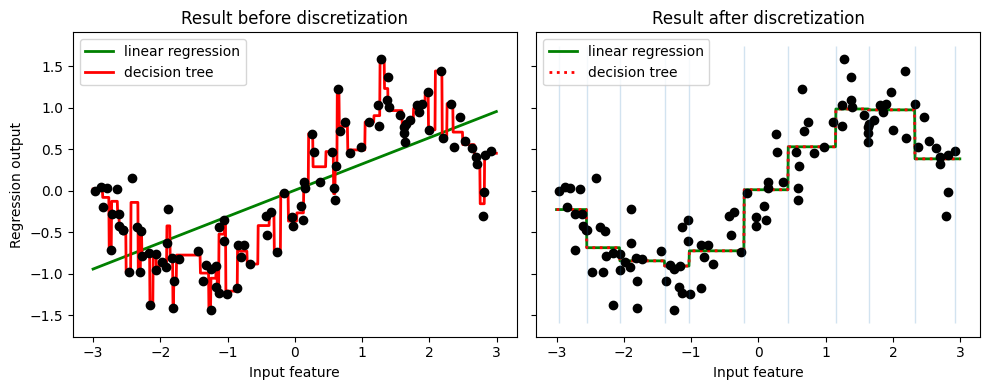

In [4]:
# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="green", label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="red", label="decision tree")
ax1.plot(X[:, 0], y, "o", c="k")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="green",
    linestyle="-",
    label="linear regression",
)
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="red",
    linestyle=":",
    label="decision tree",
)
ax2.plot(X[:, 0], y, "o", c="k")
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()